In [140]:
#Importing Keras and Neccessary Libraries:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#Importing predifined CNN model using Imagenet database
from keras.applications.vgg16 import VGG16   # Other possible models- Resnet50, VGG19, Xception etc.
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image        # For using Images
from keras.preprocessing.image import ImageDataGenerator     # Used for Data Augumentation
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
#Loading model
import tensorflow as tf
from keras.models import load_model


In [143]:
# re-size all the images that we input
IMAGE_SIZE = [224, 224]

In [142]:
# Image paths 
train_path = 'C:\\Users\\new\\Documents\\PythonFiles\\CNN\\dogs-vs-cats\\Train'
valid_path = 'C:\\Users\\new\\Documents\\PythonFiles\\CNN\\dogs-vs-cats\\Test'

In [144]:
# Add preprocessing layer to the front of VGG (weights is predifined and output layer is removed to define our own classes)
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [146]:
# Don't train existing weights (already trained with Imagenet- takes lot of GPU power)
for layer in vgg.layers:
    layer.trainable = False

In [24]:
# Getting number of classes with the number of class folders we have(by checking our training data)
folders = glob('C:\\Users\\new\\Documents\\PythonFiles\\CNN\\dogs-vs-cats\\Train/*')

In [148]:
# Our layers - you can add more if you want
x = Flatten()(vgg.output) # Fully connected output layer

prediction = Dense(len(folders), activation='sigmoid')(x) #This will have 2 classes

In [27]:
# Create a model with VGG.input and the prediction layer we made.
model = Model(inputs=vgg.input, outputs=prediction)


In [149]:
# Model Structure- Its the predefined structure except input and output layer.
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [150]:
# Compiling the model with neccessary parameters
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [151]:
# Data Augumentation- Done only for Training data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [152]:
# defining the training set
training_set =train_datagen.flow_from_directory('C:\\Users\\new\\Documents\\PythonFiles\\CNN\\dogs-vs-cats\\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')



Found 1000 images belonging to 2 classes.


In [153]:
# defining the test set
test_set = test_datagen.flow_from_directory('C:\\Users\\new\\Documents\\PythonFiles\\CNN\\dogs-vs-cats\\Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 100 images belonging to 2 classes.


In [34]:
# Fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
32/32 [==============================] - 358s 11s/step - loss: 0.8471 - accuracy: 0.6940 - val_loss: 0.5490 - val_accuracy: 0.7500
Epoch 2/5
32/32 [==============================] - 348s 11s/step - loss: 0.3182 - accuracy: 0.8650 - val_loss: 0.2212 - val_accuracy: 0.9100
Epoch 3/5
32/32 [==============================] - 359s 11s/step - loss: 0.1974 - accuracy: 0.9250 - val_loss: 0.1894 - val_accuracy: 0.9500
Epoch 4/5
32/32 [==============================] - 313s 10s/step - loss: 0.1598 - accuracy: 0.9300 - val_loss: 0.1780 - val_accuracy: 0.9400
Epoch 5/5
32/32 [==============================] - 322s 10s/step - loss: 0.1332 - accuracy: 0.9550 - val_loss: 0.1623 - val_accuracy: 0.9500


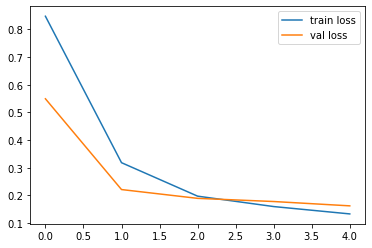

<Figure size 432x288 with 0 Axes>

In [154]:
# Graph for Losses (Training Loss and Validation Loss)
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

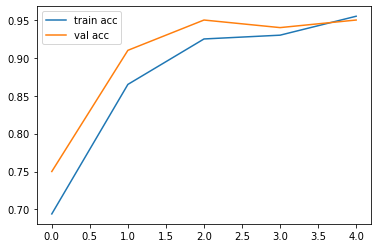

<Figure size 432x288 with 0 Axes>

In [155]:
# Graph for accuracies (Training Accuracy and Testing Accuracy)
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

In [125]:
# Saving the model
model.save('C:\\Users\\new\\Documents\\PythonFiles\\CNN\\VGG16 models\\facefeatures_new_model.h5')

In [126]:
# Loading model
model=load_model('C:\\Users\\new\\Documents\\PythonFiles\\CNN\\VGG16 models\\facefeatures_new_model.h5')

In [162]:
# Assing our image to be predicted
img=image.load_img('C:/Users/new/Documents/PythonFiles/CNN/VGG16 models/Images to predict/2.jpg',target_size=(224,224))

In [163]:
# Understanding some details about the image
print(img.format)
print(img.mode)
print(img.size)

None
RGB
(224, 224)


In [164]:
x=image.img_to_array(img) # Converting the image into array for pixel representation

In [166]:
x=np.expand_dims(x,axis=0) #expand_dims is used to add batch size for our model (none mentioned meaning 1 image at a time)

In [168]:
img_data=preprocess_input(x) # This preporcess_input normalizes our image values to the format the model requires.

In [169]:
classes=model.predict(img_data) # Prediction with our preprocessed image

In [171]:
classes # array consisting of lists of prediction. We have one list because we input only one image

array([[0., 1.]], dtype=float32)

It is a DOG, WOOF!


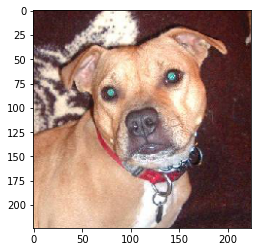

In [173]:
# Final display of results
for enum,value in enumerate(classes[0]):
    if enum==0 and value==1:
        print("It is a CAT, MEOW!")
        plt.imshow(img)
    elif enum==1 and value==1:
        print("It is a DOG, WOOF!")
        plt.imshow(img)